# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [12]:
data = pd.read_csv("weight-height.csv")
male_df =  data[data['Gender'] == "Male"] 
female_df =  data[data['Gender'] == "Female"] 

male_h_mean = male_df['Height'].mean()
male_h_sd = male_df['Height'].std()
male_w_mean = male_df['Weight'].mean()
male_w_sd = male_df['Weight'].std()
female_h_mean = female_df['Height'].mean()
female_h_sd = female_df['Height'].std()
female_w_mean = female_df['Weight'].mean()
female_w_sd = female_df['Weight'].std()

print('M height mean:', male_h_mean)
print('M height sd:', male_h_sd)
print('M weight mean:', male_w_mean)
print('M weight sd:', male_w_sd)
print('F height mean:', female_h_mean)
print('F height sd:', female_h_sd)
print('F height mean:', female_w_mean)
print('F height sd:', female_w_sd)

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

M height mean: 69.02634590621741
M height sd: 2.863362228660647
M weight mean: 187.0206206581932
M weight sd: 19.7811545167638
F height mean: 63.70877360342507
F height sd: 2.696284015765054
F height mean: 135.86009300746835
F height sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

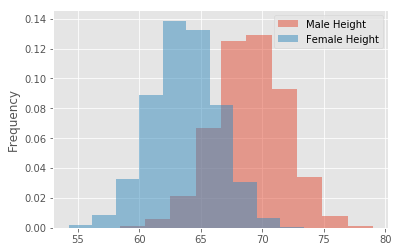

In [24]:
# Your code here
binsize = 10
male_df.Height.plot.hist(bins=binsize, density = True, alpha = 0.5, label = "Male Height");
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.5, label = "Female Height")
plt.legend()
plt.show()

#### Record your observations - are these inline with your personal observations?
The superposed histograms confirm the initial obseervation that, in general, the averaege male is taller then a female. Furthermore, the variation in mens and womans heights seem the be about the same

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

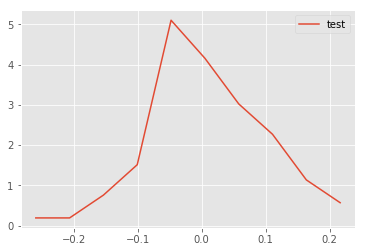

In [27]:
def density(x):
    n, bins = np.histogram(x, density =1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    
    return pdfx, pdfy




# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

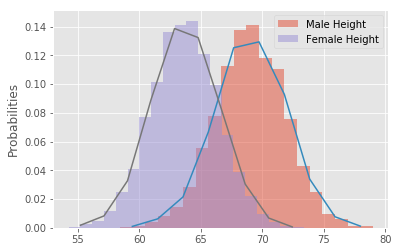

In [49]:
# Your code here 

m_pdfx, m_pdfy = density(male_df.Height)
f_pdfx, f_pdfy = density(female_df.Height)

binsize = 20
male_df.Height.plot.hist(bins=binsize, density = True, alpha = 0.5, label = "Male Height");
plt.plot(m_pdfx, m_pdfy)
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.5, label = "Female Height")
plt.plot(f_pdfx, f_pdfy)
plt.ylabel('Probabilities')
plt.legend()
plt.show()

## Repeat the above exercise for male and female weights

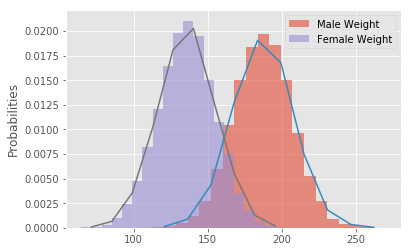

In [37]:
# Your code here
mw_pdfx, mw_pdfy = density(male_df.Weight)
fw_pdfx, fw_pdfy = density(female_df.Weight)

binsize = 20
male_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.6, label = "Male Weight");
plt.plot(mw_pdfx, mw_pdfy)
female_df.Weight.plot.hist(bins =binsize, density = True, alpha = 0.6, label = "Female Weight")
plt.plot(fw_pdfx, fw_pdfy)
plt.ylabel('Probabilities')
plt.legend()
plt.show()


## Write your observations in the cell below

#### Record your observations - are these inline with your personal observations?
Men tend to squeue heavier ten women
The variation in mens' wieghts is only slightly greater then that of women (not partilularly significant)
The overlap between men and womens weights is smaller then the overlap for height
the average males squeues closer to a wieght of around 180 (+/- 10lb) 
the average female squeues closer to a wieght of around 130 (+/- 10lb) 

#### What is the takeaway when comparing male and female heights and weights?
Weight is a more destinguishing feature betweeb men and women

## Repeat the above experiments in seaborn and compare with your results

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


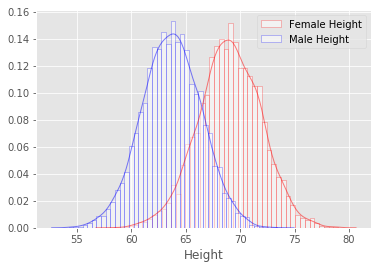

In [45]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height,
             hist = True, hist_kws = {"alpha": 0.5,
                                      "edgecolor": "red",
                                      "color": 'w',
                                      "label": "Female Height",
                                      },
             kde=True, kde_kws = {'linewidth': 1,
                                  'alpha': 0.5,
                                  'color': 'red',
                                 }
            );
sns.distplot(female_df.Height,
             hist = True, hist_kws = {"alpha": 0.5,
                                      "edgecolor": "blue",
                                      "color": 'w',
                                      "label": "Male Height",
                                      },
             kde=True, kde_kws = {'linewidth': 1,
                                  'alpha': 0.5,
                                  'color': 'blue',
                                 }
            )
plt.legend()


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


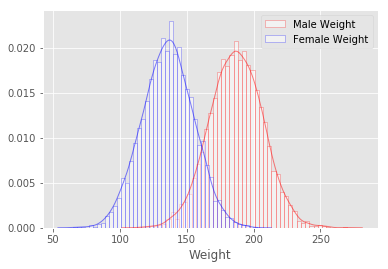

In [47]:
# Code for weights here
import scipy.stats as stats
sns.distplot(male_df.Weight,
             hist = True, hist_kws = {"alpha": 0.5,
                                      "edgecolor": "red",
                                      "color": 'w',
                                      "label": "Male Weight",
                                      },
             kde=True, kde_kws = {'linewidth': 1,
                                  'alpha': 0.5,
                                  'color': 'red',
                                 }
            );
sns.distplot(female_df.Weight,
             hist = True, hist_kws = {"alpha": 0.5,
                                      "edgecolor": "blue",
                                      "color": 'w',
                                      "label": "Female Weight",
                                      },
             kde=True, kde_kws = {'linewidth': 1,
                                  'alpha': 0.5,
                                  'color': 'blue',
                                 }
            )
plt.legend()

#### Your comments on the two approaches here. 
Both approaches are relatively similar with respect to the outcome. They both produce histograms with pdf fuctions for the desired features.
That being said, using seaborn is significantly quicker as it does not require the creation of a seperate function to return the probability denisty funtion for a given data set. 
The first strategy however (long hand) is not without its merits as it does allow one to get better aquaitned with the idea of a pdf and with the dataset itself.
As a whole though, seaborn seems to return a much neater graph, with a more rounded pdf.

#### are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.